## VERİ ANALİZİ

In [2]:
from google.colab import files
uploaded = files.upload()


Saving NAFLD.xlsx to NAFLD.xlsx


In [3]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['NAFLD.xlsx']))

In [4]:
# Sütun isimlerini ve veri tiplerini kontrol et
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 62 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    int64  
 1   Age                                                                                          605 non-null    int64  
 2   Gender (Female=1, Male=2)                                                                    605 non-null    int64  
 3   Height                                                                                       605 non-null    int64  
 4   Weight                                                                                       605 non-null    int64  
 5   Body Mass Index                     

In [5]:
# İlk birkaç satırı gör
df.head()

,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
0,1,60,1,150,80,35.56,119.0,104.0,135,77,...,2,1,4,1,1,0,0,0,1,2
1,2,55,1,154,73,30.78,101.0,98.0,120,72,...,2,0,4,1,0,0,0,0,1,2
2,3,53,2,170,101,34.95,116.0,112.0,120,80,...,2,3,4,1,1,1,1,0,1,2
3,4,33,2,175,95,31.02,114.0,114.0,124,83,...,2,1,4,1,1,0,0,0,1,2
4,5,23,2,162,68,25.91,101.0,97.0,124,79,...,2,0,4,1,0,0,0,0,1,2


Diagnosis according to SAF (NASH=1, NAFL=2)
1    537
2     68
Name: count, dtype: int64
Diagnosis according to SAF (NASH=1, NAFL=2)
1    88.760331
2    11.239669
Name: proportion, dtype: float64


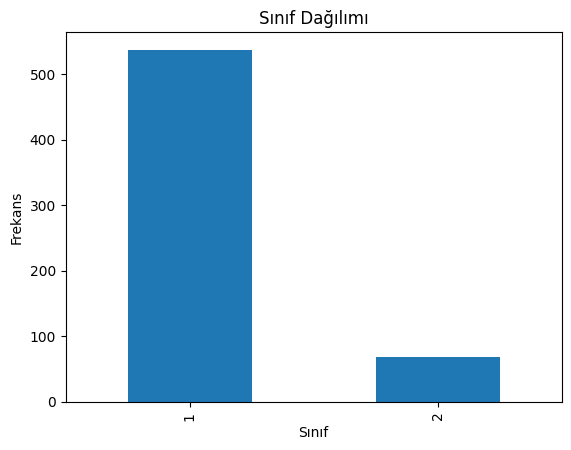

In [6]:
# Bağımsız değişkenler (X) ve hedef değişken (y) olarak veri setini ayıralım
X = df.drop(columns=["Diagnosis according to SAF (NASH=1, NAFL=2)"])
y = df["Diagnosis according to SAF (NASH=1, NAFL=2)"]

# Hedef değişkenin sınıf dağılımı
class_distribution = y.value_counts()
print(class_distribution)

# Sınıf dağılımını yüzde olarak göstermek
class_percentage = y.value_counts(normalize=True) * 100
print(class_percentage)

import matplotlib.pyplot as plt

# Sınıf dağılımını görselleştir
class_distribution.plot(kind='bar')
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Frekans')
plt.show()


In [7]:
# Eksik veri analizi: Her sütundaki eksik veri sayısı ve oranı
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Eksik veri analizi sonuç tablosu
missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Percentage (%)": missing_percentage
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_data_summary

,Missing Values,Missing Percentage (%)
Microalbumin/Creatinine Ratio,490,80.991736
CK,452,74.710744
C Peptide,438,72.396694
Microalbumin Spot Urine,422,69.752066
Vitamin D,412,68.099174
...,...,...
Body Mass Index,0,0.000000
Weight,0,0.000000
Height,0,0.000000
"Gender (Female=1, Male=2)",0,0.000000


<ipython-input-8-355e3bf5dedf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


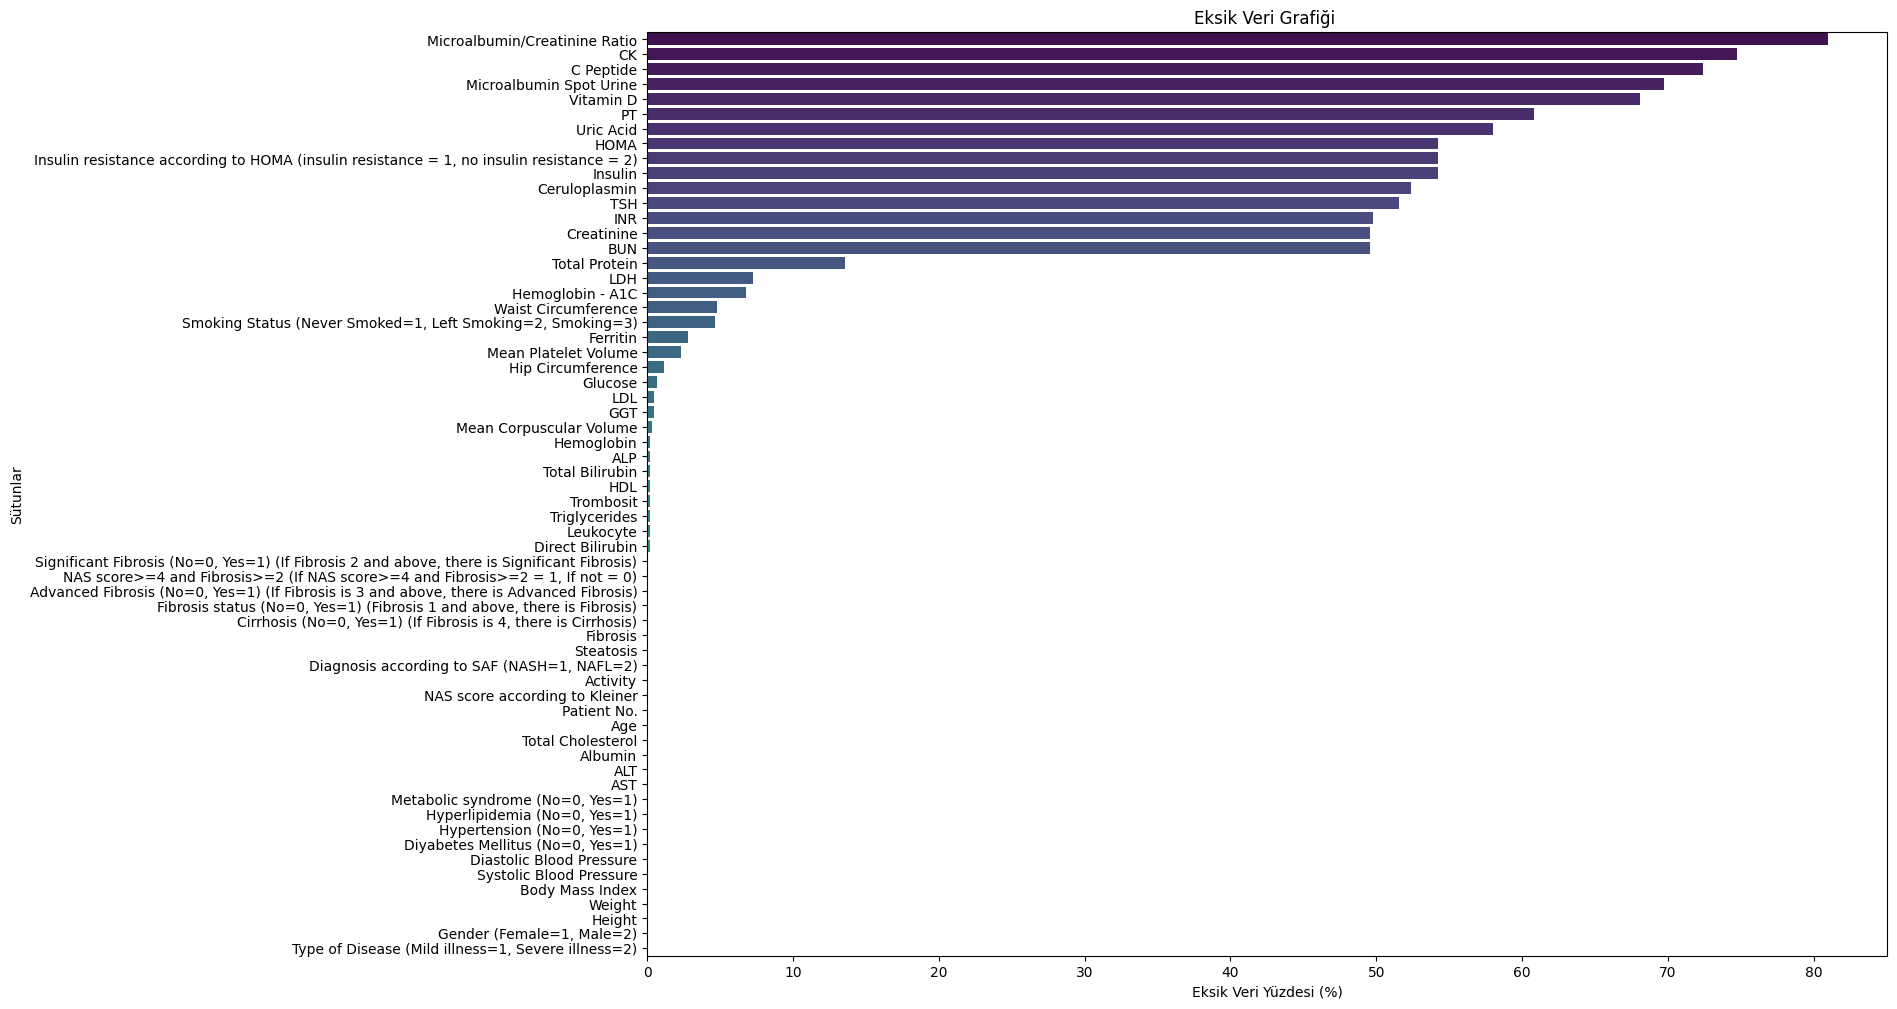

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eksik veri yüzdelerini görselleştirme
plt.figure(figsize=(16, 12))
sns.barplot(
    x=missing_data_summary["Missing Percentage (%)"],
    y=missing_data_summary.index,
    palette="viridis"
)
plt.xlabel("Eksik Veri Yüzdesi (%)")
plt.ylabel("Sütunlar")
plt.title("Eksik Veri Grafiği ")
plt.show()


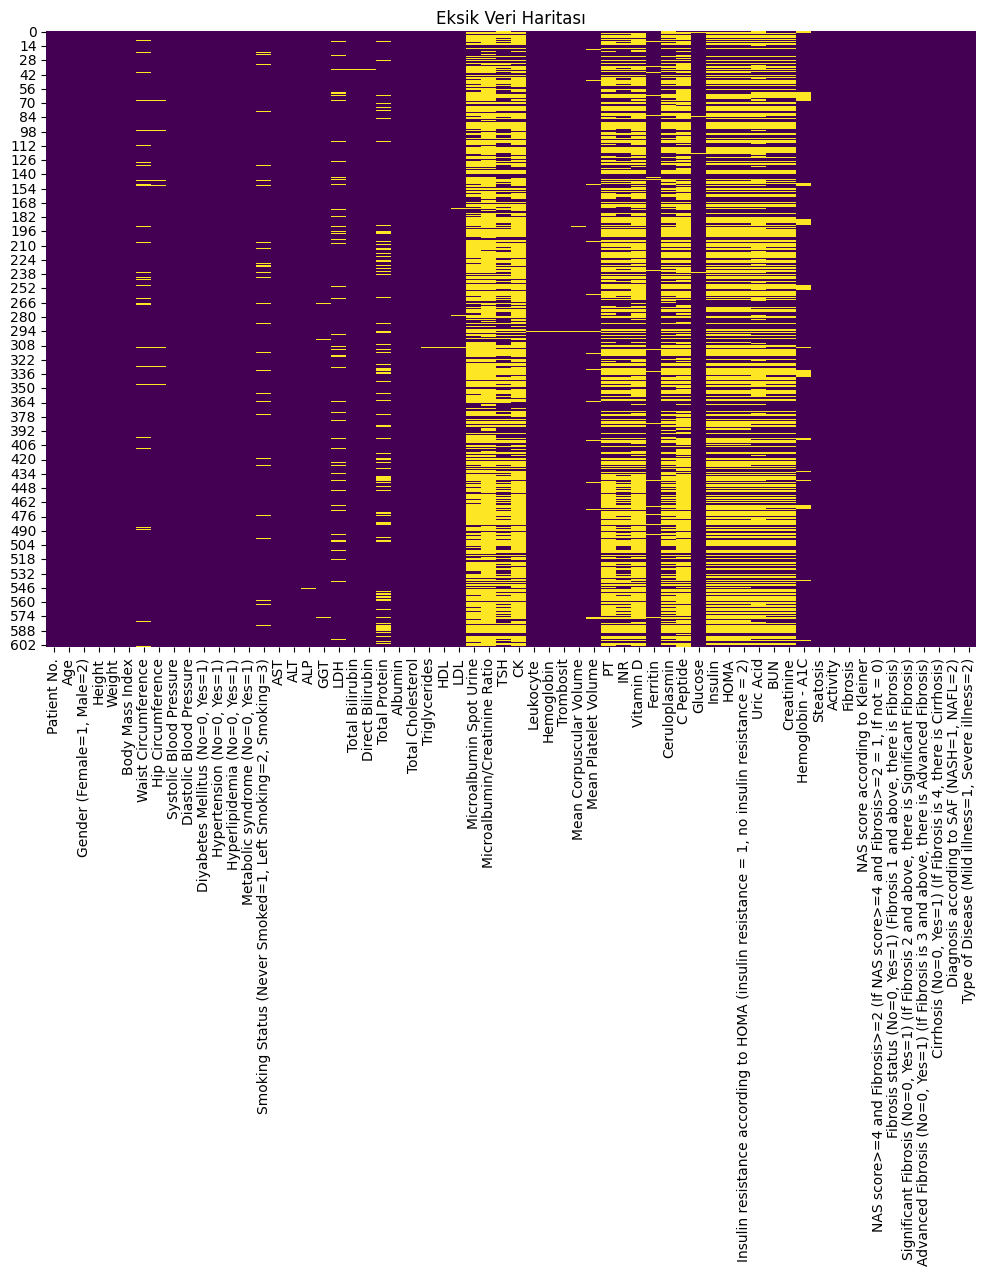

In [9]:
# Eksik değerler
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Veri Haritası")
plt.show()

In [10]:
# %60 üzerinde eksik veriye sahip sütunları belirleme
threshold = 60
columns_to_drop = missing_data_summary[missing_data_summary["Missing Percentage (%)"] > threshold].index

# Çıkarılan sütunları yazdırma
print("Çıkarılan sütunlar:")
print(columns_to_drop)

# Bu sütunları veri setinden çıkarma
df_cleaned = df.drop(columns=columns_to_drop)

# Kalan eksik verileri ortalama ile doldurma
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Temizlenmiş veri setindeki eksik veri sayısını kontrol etme
remaining_missing = df_cleaned.isnull().sum().sum()

print("Temizlenmiş veri setinin boyutu:", df_cleaned.shape)
print("Kalan eksik veri sayısı:", remaining_missing)



Çıkarılan sütunlar:
Index(['Microalbumin/Creatinine Ratio', 'CK', 'C Peptide',
       'Microalbumin Spot Urine', 'Vitamin D', 'PT'],
      dtype='object')
Temizlenmiş veri setinin boyutu: (605, 56)
Kalan eksik veri sayısı: 0


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 56 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    int64  
 1   Age                                                                                          605 non-null    int64  
 2   Gender (Female=1, Male=2)                                                                    605 non-null    int64  
 3   Height                                                                                       605 non-null    int64  
 4   Weight                                                                                       605 non-null    int64  
 5   Body Mass Index                     

<ipython-input-12-43a6ff8ae399>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


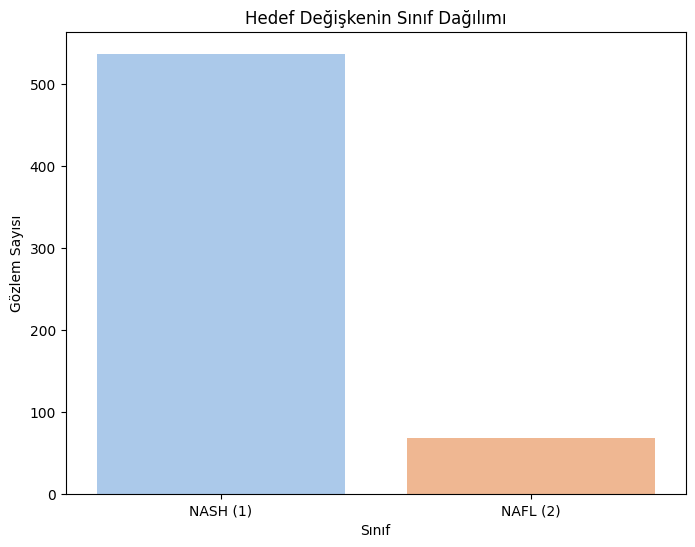

(Diagnosis according to SAF (NASH=1, NAFL=2)
 1    537
 2     68
 Name: count, dtype: int64,
 Diagnosis according to SAF (NASH=1, NAFL=2)
 1    88.760331
 2    11.239669
 Name: proportion, dtype: float64)

In [12]:
# Hedef değişkenin adı (sabit)
target_column = "Diagnosis according to SAF (NASH=1, NAFL=2)"

# Sınıf dağılımı analizi
class_distribution = df_cleaned[target_column].value_counts()
class_percentage = df_cleaned[target_column].value_counts(normalize=True) * 100

# Sınıf dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(
    x=class_distribution.index,
    y=class_distribution.values,
    palette="pastel"
)
plt.xlabel("Sınıf")
plt.ylabel("Gözlem Sayısı")
plt.title("Hedef Değişkenin Sınıf Dağılımı")
plt.xticks([0, 1], ["NASH (1)", "NAFL (2)"])
plt.show()

class_distribution, class_percentage


Gözlem Sayısı:
* NASH (1): 537 gözlem (%88.76)
* NAFL (2): 68 gözlem (%11.24)

In [20]:
# Sayısal değişkenlerin özet istatistikleri
numerical_summary = df_cleaned.describe()

numerical_summary

,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,...,605.000000,605.000000,605.000000,605.00000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,303.000000,46.302479,1.530579,164.790083,86.403306,31.868711,109.440972,104.306020,127.276033,82.423140,...,2.884298,1.256198,5.082645,0.71405,0.676033,0.361983,0.178512,0.039669,1.112397,1.902479
std,174.792734,10.646148,0.499477,9.920240,14.379183,5.106853,10.331428,10.325417,15.314631,9.941857,...,1.042079,1.164663,1.597736,0.45224,0.468375,0.480972,0.383260,0.195343,0.316115,0.296911
min,1.000000,18.000000,1.000000,135.000000,48.000000,18.290000,63.000000,70.000000,90.000000,51.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,152.000000,38.000000,1.000000,157.000000,78.000000,28.610000,103.000000,98.000000,120.000000,80.000000,...,2.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,303.000000,47.000000,2.000000,165.000000,85.000000,31.210000,109.000000,104.000000,121.000000,80.000000,...,3.000000,1.000000,5.000000,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,454.000000,54.000000,2.000000,172.000000,94.000000,34.520000,115.000000,110.000000,135.000000,90.000000,...,4.000000,2.000000,6.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,605.000000,71.000000,2.000000,193.000000,158.000000,56.000000,155.000000,147.000000,190.000000,120.000000,...,4.000000,4.000000,8.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


Veri setindeki sayısal değişkenler için istatistiksel özet (ortalama, standart sapma, minimum, maksimum değerler vb.) elde edildi. Tüm sütunlar arasında geniş bir varyasyon var.

In [16]:
# Hedef değişkenle olan korelasyonlar
correlations = df_cleaned.corr()[target_column].sort_values(ascending=False)

correlations

,"Diagnosis according to SAF (NASH=1, NAFL=2)"
"Diagnosis according to SAF (NASH=1, NAFL=2)",1.000000
BUN,0.230937
"Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)",0.159306
Creatinine,0.144542
Patient No.,0.134477
"Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)",0.108604
Ceruloplasmin,0.087147
Total Protein,0.080661
"Gender (Female=1, Male=2)",0.072569
Hemoglobin,0.068660


**Korelasyon Analizi:**
* Hedef değişkenle en güçlü pozitif ilişkiyi gösteren değişken:
  * BUN (0.23 korelasyon).
* Hedef değişkenle en güçlü negatif ilişkiyi gösteren değişkenler:
  * Type of Disease (Mild illness=1, Severe illness=2) (-0.92)
  * Activity (-0.68)
  * NAS score according to Kleiner (-0.53)

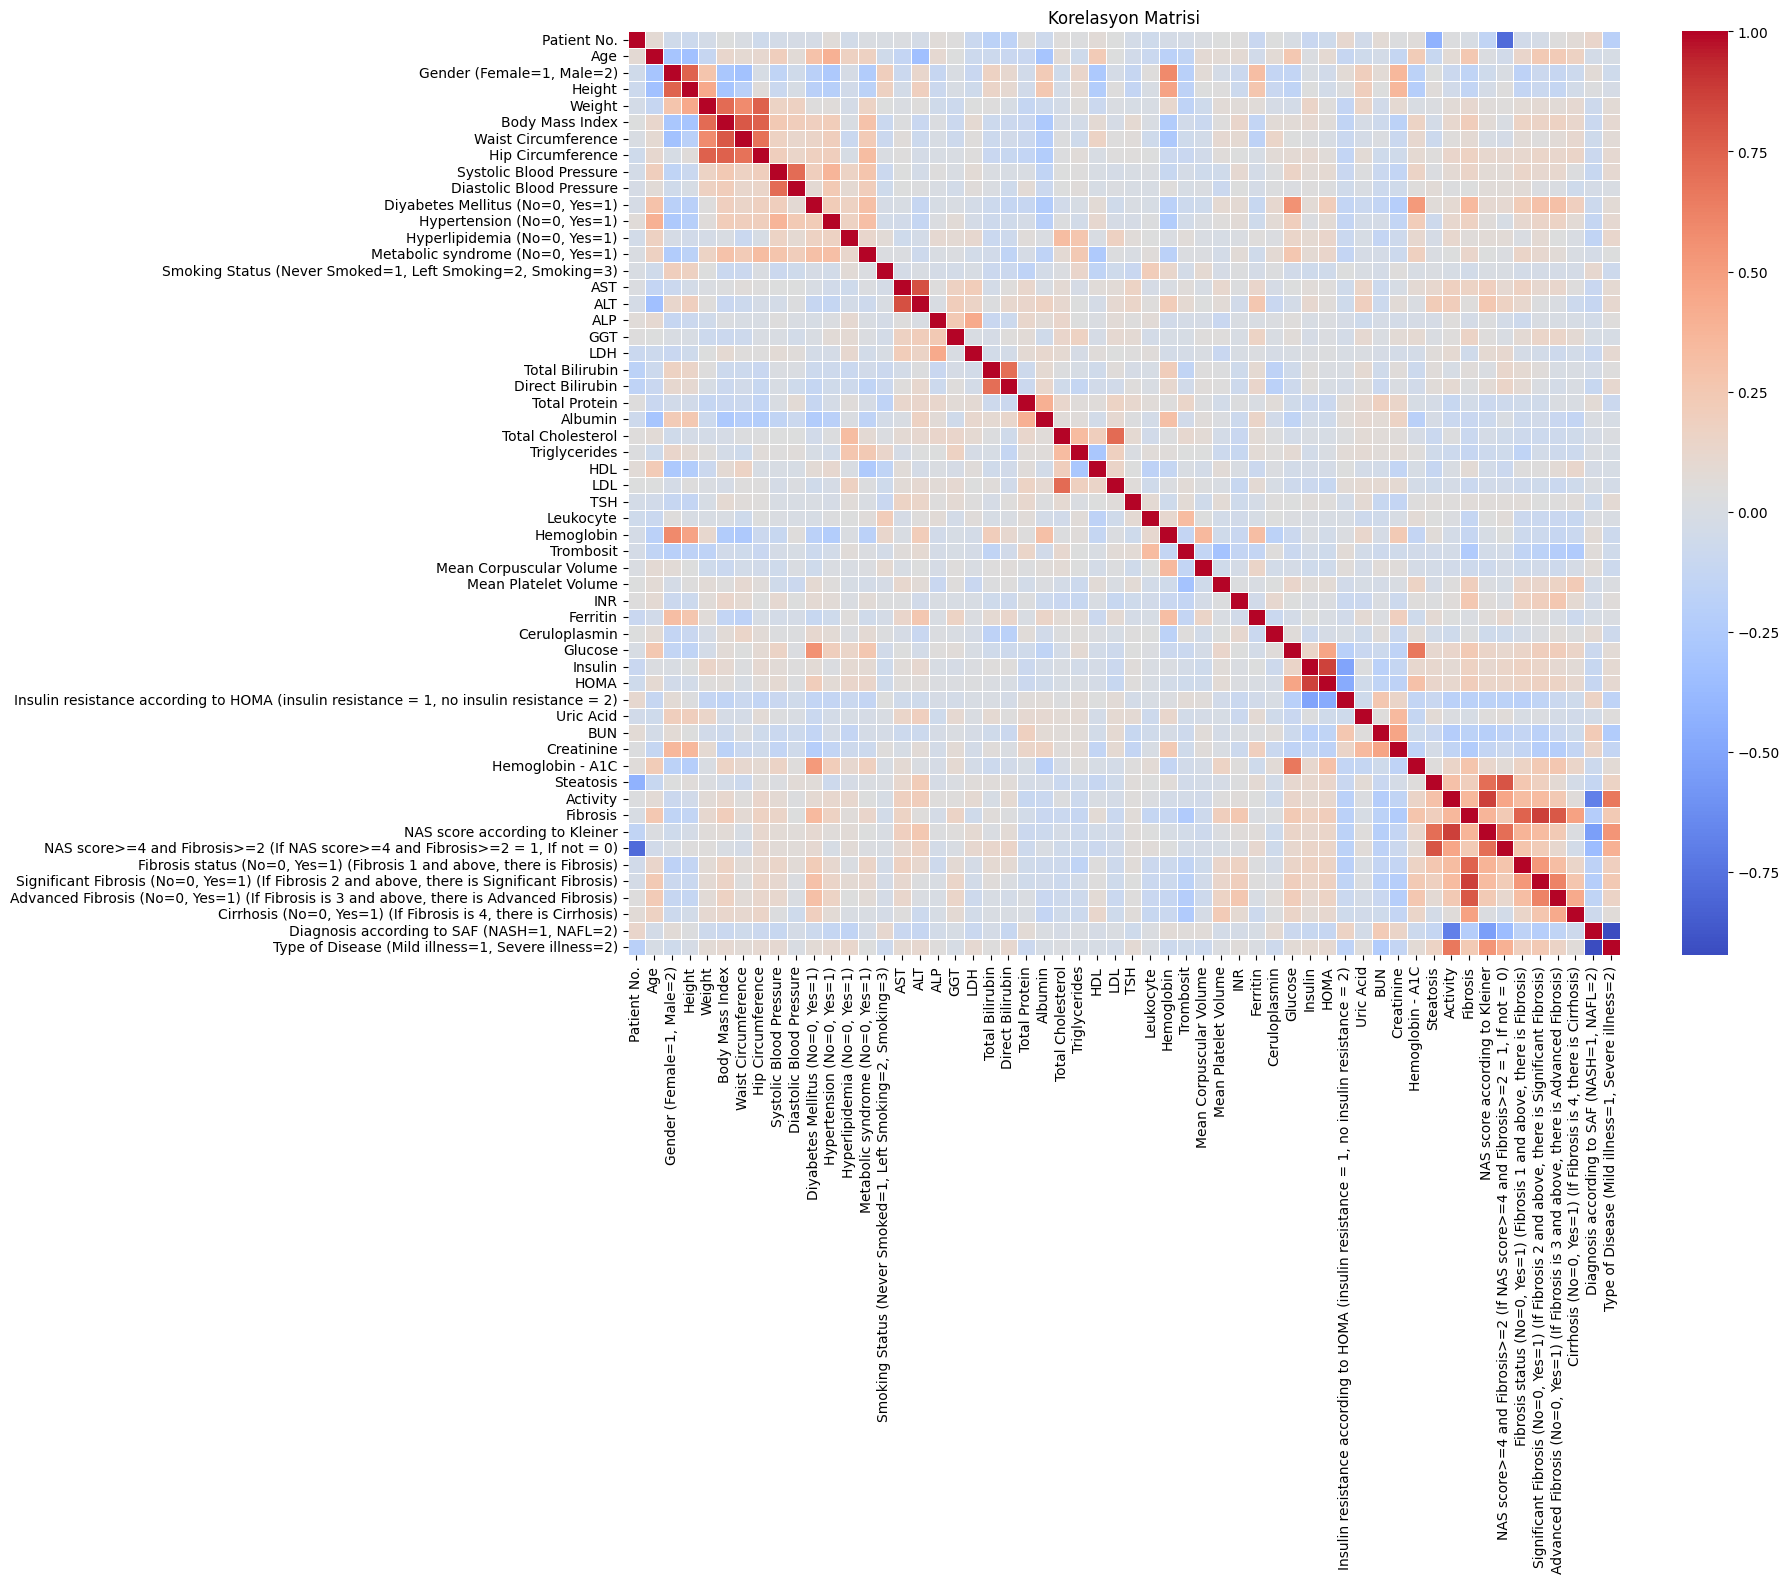

In [42]:
# Korelasyon matrisi
correlation_matrix = df_cleaned.corr()

# Korelasyon ısı haritasını oluşturma
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Korelasyon Matrisi")
plt.show()


**modelleme**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Veriyi eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Karar Ağacı Modeli
print("\n--- Karar Ağacı ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_dt = cohen_kappa_score(y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Cohen Kappa:", cohen_kappa_dt)
print("MCC:", mcc_dt)
print("Karmaşıklık Matrisi:\n", conf_matrix_dt)
print("Sınıflandırma Raporu:\n", classification_rep_dt)

# Rastgele Orman Modeli
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Cohen Kappa:", cohen_kappa_rf)
print("MCC:", mcc_rf)
print("Karmaşıklık Matrisi:\n", conf_matrix_rf)
print("Sınıflandırma Raporu:\n", classification_rep_rf)

# SVM Modeli
print("\n--- SVM ---")
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Cohen Kappa:", cohen_kappa_svm)
print("MCC:", mcc_svm)
print("Karmaşıklık Matrisi:\n", conf_matrix_svm)
print("Sınıflandırma Raporu:\n", classification_rep_svm)




--- Karar Ağacı ---
Accuracy: 0.9917355371900827
Cohen Kappa: 0.9608287471673681
MCC: 0.9615667381416182
Karmaşıklık Matrisi:
 [[106   1]
 [  0  14]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

    NASH (1)       1.00      0.99      1.00       107
    NAFL (2)       0.93      1.00      0.97        14

    accuracy                           0.99       121
   macro avg       0.97      1.00      0.98       121
weighted avg       0.99      0.99      0.99       121


--- Random Forest ---
Accuracy: 1.0
Cohen Kappa: 1.0
MCC: 1.0
Karmaşıklık Matrisi:
 [[107   0]
 [  0  14]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

    NASH (1)       1.00      1.00      1.00       107
    NAFL (2)       1.00      1.00      1.00        14

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121


--- SVM ---
Accuracy: 0.9834710743801653

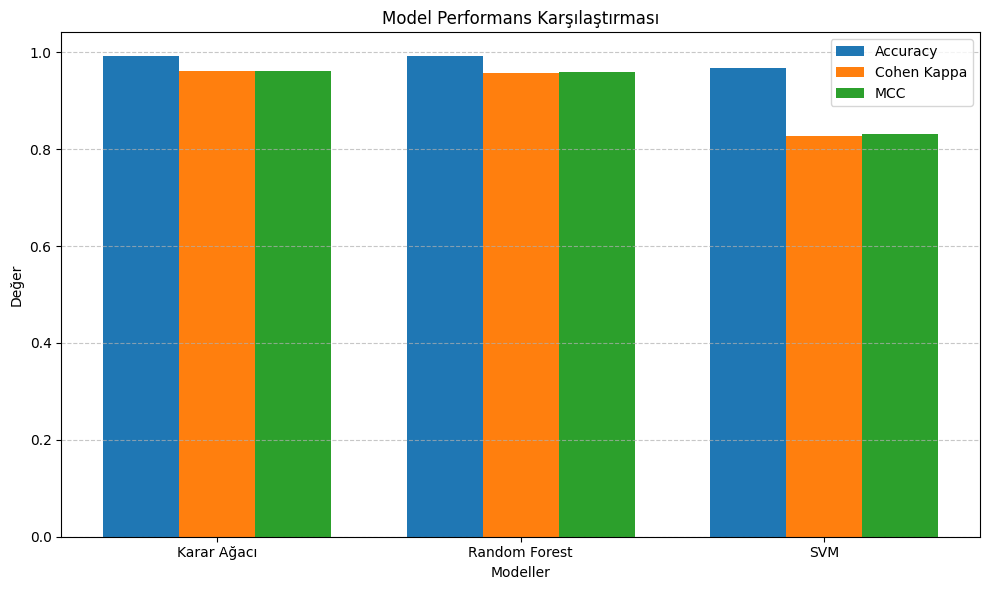

In [66]:
# Performans sonuçlarını kaydetme
results = {
    "Karar Ağacı": {
        "Accuracy": accuracy_dt,
        "Cohen Kappa": cohen_kappa_dt,
        "MCC": mcc_dt
    },
    "Random Forest": {
        "Accuracy": accuracy_rf,
        "Cohen Kappa": cohen_kappa_rf,
        "MCC": mcc_rf
    },
    "SVM": {
        "Accuracy": accuracy_svm,
        "Cohen Kappa": cohen_kappa_svm,
        "MCC": mcc_svm
    }
}

import matplotlib.pyplot as plt
import numpy as np

# Modeller ve metrikler
models = list(results.keys())
metrics = ["Accuracy", "Cohen Kappa", "MCC"]

# Verileri hazırlama
values = np.array([[results[model][metric] for metric in metrics] for model in models])

# Grafik boyutu ve çubuk genişliği
x = np.arange(len(models))
width = 0.25

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[:, i], width, label=metric)

# Eksen ayarları
ax.set_xlabel("Modeller")
ax.set_ylabel("Değer")
ax.set_title("Model Performans Karşılaştırması")
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend(loc="best")
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()


SMOTE Yöntemiyle Güncellenmiş Kod

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, matthews_corrcoef

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Veriyi eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE uygulanmadan önce sınıf dağılımı:")
print(y_train.value_counts())
print("\nSMOTE uygulandıktan sonra sınıf dağılımı:")
print(y_train_smote.value_counts())

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Karar Ağacı Modeli (SMOTE ile)
print("\n--- Karar Ağacı (SMOTE) ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote_scaled, y_train_smote)
y_pred_dt = dt_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_dt = cohen_kappa_score(y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Cohen Kappa:", cohen_kappa_dt)
print("MCC:", mcc_dt)
print("Karmaşıklık Matrisi:\n", conf_matrix_dt)
print("Sınıflandırma Raporu:\n", classification_rep_dt)

# Random Forest Modeli (SMOTE ile)
print("\n--- Random Forest (SMOTE) ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote_scaled, y_train_smote)
y_pred_rf = rf_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Cohen Kappa:", cohen_kappa_rf)
print("MCC:", mcc_rf)
print("Karmaşıklık Matrisi:\n", conf_matrix_rf)
print("Sınıflandırma Raporu:\n", classification_rep_rf)

# SVM Modeli (SMOTE ile)
print("\n--- SVM (SMOTE) ---")
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_smote_scaled, y_train_smote)
y_pred_svm = svm_model.predict(X_test_scaled)

# Performans değerlendirme
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=["NASH (1)", "NAFL (2)"])
cohen_kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Cohen Kappa:", cohen_kappa_svm)
print("MCC:", mcc_svm)
print("Karmaşıklık Matrisi:\n", conf_matrix_svm)
print("Sınıflandırma Raporu:\n", classification_rep_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


SMOTE uygulanmadan önce sınıf dağılımı:
Diagnosis according to SAF (NASH=1, NAFL=2)
1    430
2     54
Name: count, dtype: int64

SMOTE uygulandıktan sonra sınıf dağılımı:
Diagnosis according to SAF (NASH=1, NAFL=2)
1    430
2    430
Name: count, dtype: int64

--- Karar Ağacı (SMOTE) ---
Accuracy: 0.9917355371900827
Cohen Kappa: 0.9608287471673681
MCC: 0.9615667381416182
Karmaşıklık Matrisi:
 [[106   1]
 [  0  14]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

    NASH (1)       1.00      0.99      1.00       107
    NAFL (2)       0.93      1.00      0.97        14

    accuracy                           0.99       121
   macro avg       0.97      1.00      0.98       121
weighted avg       0.99      0.99      0.99       121


--- Random Forest (SMOTE) ---
Accuracy: 0.9917355371900827
Cohen Kappa: 0.9583189803651395
MCC: 0.9591525139275531
Karmaşıklık Matrisi:
 [[107   0]
 [  1  13]]
Sınıflandırma Raporu:
               precision    recall  f1-score   su

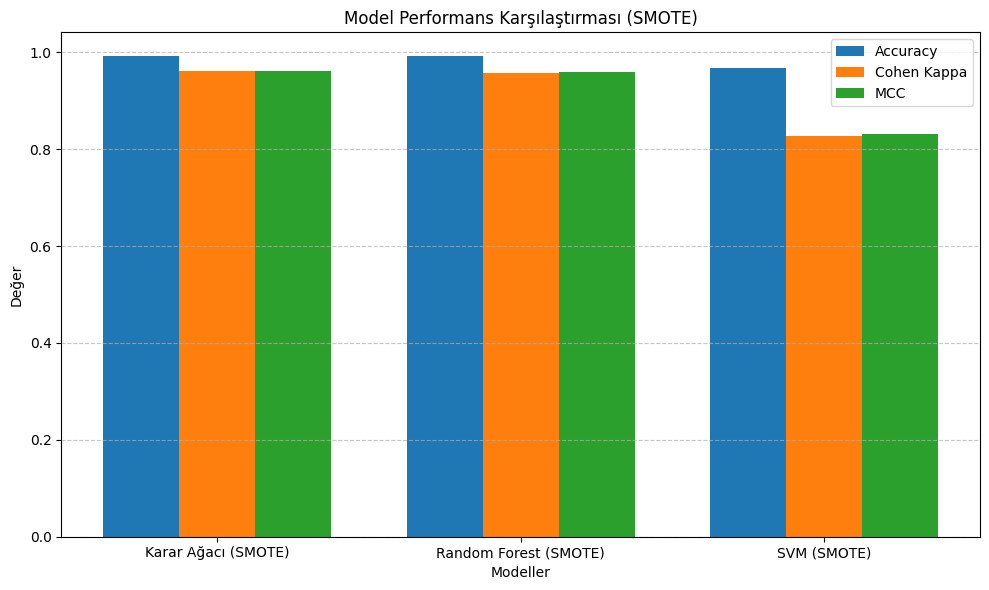

In [68]:
# Performans sonuçlarını kaydetme
results_smote = {
    "Karar Ağacı (SMOTE)": {
        "Accuracy": accuracy_dt,
        "Cohen Kappa": cohen_kappa_dt,
        "MCC": mcc_dt
    },
    "Random Forest (SMOTE)": {
        "Accuracy": accuracy_rf,
        "Cohen Kappa": cohen_kappa_rf,
        "MCC": mcc_rf
    },
    "SVM (SMOTE)": {
        "Accuracy": accuracy_svm,
        "Cohen Kappa": cohen_kappa_svm,
        "MCC": mcc_svm
    }
}

import matplotlib.pyplot as plt
import numpy as np

# Modeller ve metrikler
models_smote = list(results_smote.keys())
metrics_smote = ["Accuracy", "Cohen Kappa", "MCC"]

# Verileri hazırlama
values_smote = np.array([[results_smote[model][metric] for metric in metrics_smote] for model in models_smote])

# Grafik boyutu ve çubuk genişliği
x_smote = np.arange(len(models_smote))
width_smote = 0.25

# Grafik oluşturma
fig_smote, ax_smote = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics_smote):
    ax_smote.bar(x_smote + i * width_smote, values_smote[:, i], width_smote, label=metric)

# Eksen ayarları
ax_smote.set_xlabel("Modeller")
ax_smote.set_ylabel("Değer")
ax_smote.set_title("Model Performans Karşılaştırması (SMOTE)")
ax_smote.set_xticks(x_smote + width_smote)
ax_smote.set_xticklabels(models_smote)
ax_smote.legend(loc="best")
ax_smote.grid(axis="y", linestyle="--", alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()
